In [ ]:
## Get the data
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()


--2023-12-23 20:12:16--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.128.207, 74.125.143.207, 173.194.69.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.128.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  33.3MB/s    in 3.1s    

2023-12-23 20:12:20 (33.3 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
zip_ref.close()

## Inspect the data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [ ]:
import os

# Walk trough directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualize our images, first let's get the class names programmatically

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class

  random_image = random.sample(os.listdir(target_folder),1,)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  return img

Image shape: (512, 512, 3)


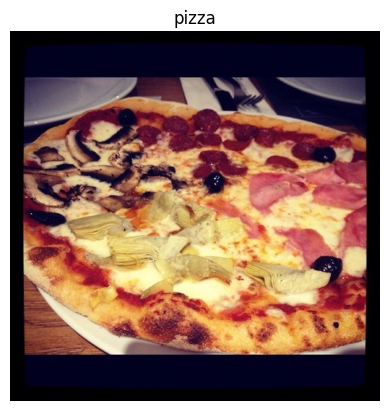

In [ ]:
img = view_random_image("pizza_steak/train/", "pizza")

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]],

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]],

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]],

       ...,

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]],

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]],

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]]], dtype=uint8)>

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we a need way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 and 1, also called scalling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, batch_size=32, target_size=(224,224), class_mode="binary", seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir, batch_size=32, target_size=(224,224), class_mode="binary", seed=42)

FileNotFoundError: ignored

In [ ]:
len(train_data)

47

In [ ]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")

])

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 15s 178ms/step - loss: 0.6009 - accuracy: 0.6713 - val_loss: 0.4560 - val_accuracy: 0.7940
Epoch 2/5
47/47 [==============================] - 8s 162ms/step - loss: 0.4659 - accuracy: 0.7787 - val_loss: 0.4171 - val_accuracy: 0.8040
Epoch 3/5
47/47 [==============================] - 7s 148ms/step - loss: 0.4605 - accuracy: 0.7867 - val_loss: 0.4534 - val_accuracy: 0.7900
Epoch 4/5
47/47 [==============================] - 6s 119ms/step - loss: 0.4262 - accuracy: 0.8240 - val_loss: 0.3827 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 7s 145ms/step - loss: 0.3692 - accuracy: 0.8493 - val_loss: 0.3659 - val_accuracy: 0.8360


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

## Binary Classification: Let's break it down

1. Become one with the data
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing)
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model
7. Repeat until satisfied

### 1. Become one with the data

Image shape: (384, 512, 3)
Image shape: (512, 512, 3)


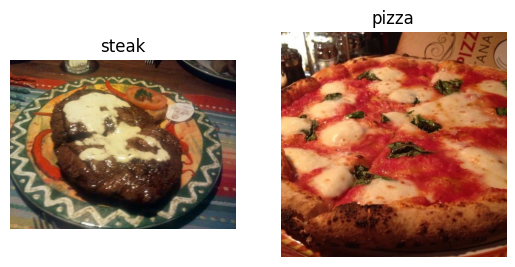

In [ ]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

In [ ]:
train_data

### 2. Preprocess the data (normalizing and turning into batches)

In [ ]:
# Define directory datasets paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **BATCHES**

32 is the best!

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next() # get the "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [ ]:
len(train_data)

47

In [ ]:
# First 2 images
images[:2], images[0].shape

(array([[[[0.41960788, 0.24705884, 0.07058824],
          [0.4156863 , 0.24313727, 0.06666667],
          [0.39607847, 0.22352943, 0.04705883],
          ...,
          [0.47450984, 0.28235295, 0.12156864],
          [0.48235297, 0.2901961 , 0.12941177],
          [0.48235297, 0.2901961 , 0.12941177]],
 
         [[0.3921569 , 0.21960786, 0.04313726],
          [0.4039216 , 0.23137257, 0.05490196],
          [0.427451  , 0.25490198, 0.07843138],
          ...,
          [0.46274513, 0.27058825, 0.10980393],
          [0.46274513, 0.27058825, 0.10980393],
          [0.4666667 , 0.27450982, 0.1137255 ]],
 
         [[0.4039216 , 0.23137257, 0.05490196],
          [0.39607847, 0.22352943, 0.04705883],
          [0.39607847, 0.22352943, 0.04705883],
          ...,
          [0.43921572, 0.24705884, 0.08627451],
          [0.45882356, 0.26666668, 0.10588236],
          [0.46274513, 0.27058825, 0.10980393]],
 
         ...,
 
         [[0.38823533, 0.34901962, 0.3137255 ],
          [0.40784

In [ ]:
labels

array([0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1.],
      dtype=float32)

In [ ]:
labels[31]

1.0

### 3. Create a CNN model (start with a baseline)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid")
])

**Note**: In deep learning you may make an infinite amount of architectures. **Start with simple model, then add complexity to it!**

In [ ]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

### 4. Fit the model

In [ ]:
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Fit the model
# Train and data block!!!!!
history = model_4.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 9s 148ms/step - loss: 0.8449 - accuracy: 0.6707 - val_loss: 0.5056 - val_accuracy: 0.7560
Epoch 2/5
47/47 [==============================] - 6s 122ms/step - loss: 0.4964 - accuracy: 0.7587 - val_loss: 0.4547 - val_accuracy: 0.7920
Epoch 3/5
47/47 [==============================] - 6s 118ms/step - loss: 0.3781 - accuracy: 0.8420 - val_loss: 0.4085 - val_accuracy: 0.7880
Epoch 4/5
47/47 [==============================] - 7s 150ms/step - loss: 0.2479 - accuracy: 0.9140 - val_loss: 0.4562 - val_accuracy: 0.7700
Epoch 5/5
47/47 [==============================] - 6s 122ms/step - loss: 0.1265 - accuracy: 0.9613 - val_loss: 0.4335 - val_accuracy: 0.8080


<Axes: >

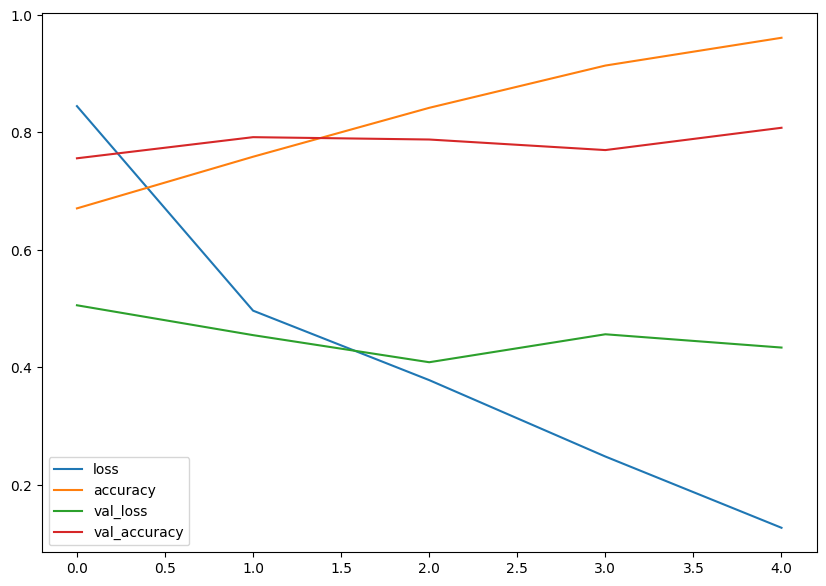

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10,7))

In [ ]:
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()


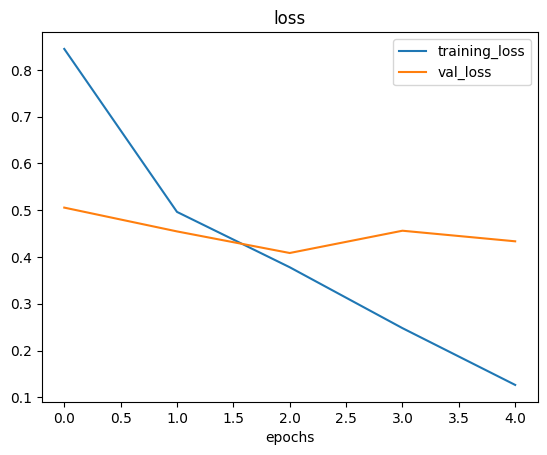

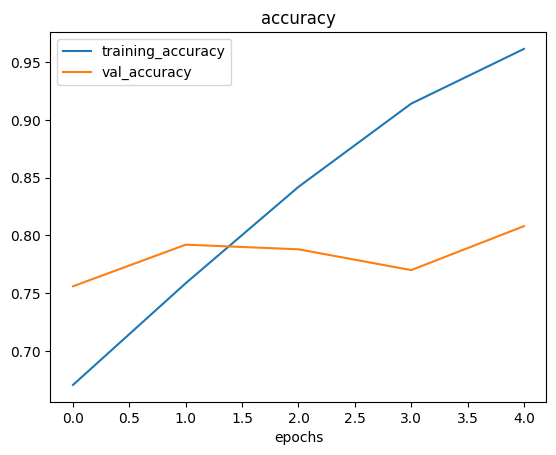

In [ ]:
plot_loss_curves(history)

Ways to induce overfitting:
1. Increase the number of conv layers
2. Increase the number of conv filters
3. Add another dense layer to the output of our flattened layer

Reduce overfitting:
1. Add data augmentation
2. Add regularization layers ( such as MaxPool2d)
3. Add more data...
4. Use Dropout, weight regularization, early-stopping
5. Use Transfer Learning ( a model already trained on similar datasets)

In [ ]:
model_5 = Sequential([
    Conv2D(10,3,activation='relu', input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])

In [ ]:
model_5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

In [ ]:
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
history_5 = model_5.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 143ms/step - loss: 0.6239 - accuracy: 0.6573 - val_loss: 0.4603 - val_accuracy: 0.7980
Epoch 2/5
47/47 [==============================] - 5s 115ms/step - loss: 0.4592 - accuracy: 0.7947 - val_loss: 0.3602 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 8s 166ms/step - loss: 0.3975 - accuracy: 0.8300 - val_loss: 0.3386 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 5s 115ms/step - loss: 0.3838 - accuracy: 0.8320 - val_loss: 0.3248 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 5s 112ms/step - loss: 0.3601 - accuracy: 0.8553 - val_loss: 0.3166 - val_accuracy: 0.8720


In [ ]:
valid_data

In [ ]:
valid_data.next()

(array([[[[0.49803925, 0.23137257, 0.09411766],
          [0.48235297, 0.22352943, 0.09019608],
          [0.49803925, 0.2509804 , 0.12156864],
          ...,
          [0.8352942 , 0.83921576, 0.8470589 ],
          [0.83921576, 0.8431373 , 0.85098046],
          [0.8235295 , 0.82745105, 0.8352942 ]],
 
         [[0.5568628 , 0.30588236, 0.20000002],
          [0.4666667 , 0.22352943, 0.13333334],
          [0.42352945, 0.18431373, 0.10196079],
          ...,
          [0.8352942 , 0.83921576, 0.8470589 ],
          [0.83921576, 0.8431373 , 0.85098046],
          [0.83921576, 0.8431373 , 0.85098046]],
 
         [[0.3372549 , 0.1137255 , 0.03529412],
          [0.3647059 , 0.14117648, 0.07450981],
          [0.36078432, 0.13333334, 0.07843138],
          ...,
          [0.83921576, 0.8431373 , 0.85098046],
          [0.8431373 , 0.8470589 , 0.854902  ],
          [0.8470589 , 0.86274517, 0.8745099 ]],
 
         ...,
 
         [[0.627451  , 0.60784316, 0.48235297],
          [0.60784

In [ ]:
len(valid_data)

16

In [ ]:
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


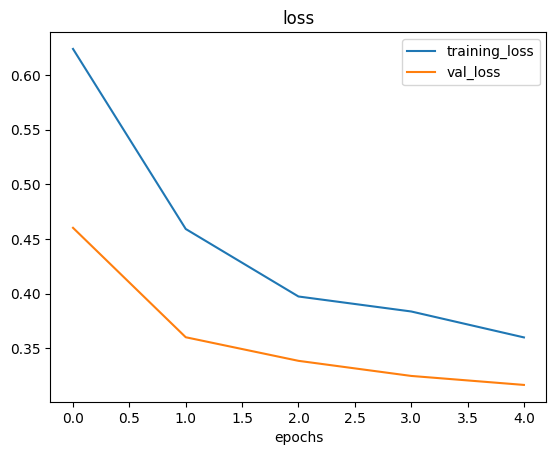

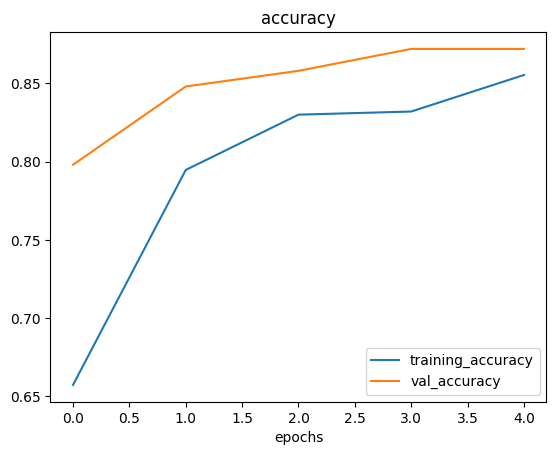

In [ ]:
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

In [1]:
# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

NameError: ignored

In [ ]:
print("Augmented training data: ")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=True)
print("Non-augmented training data: ")
train_data = train_datagen.flow_from_directory(train_dir,
                                                            target_size=(224,224),
                                                            batch_size=32,
                                                            class_mode="binary",
                                                            shuffle=True)
IMG_SIZE=(224,224)
print("Non-augmented test data: ")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data: 
Found 1500 images belonging to 2 classes.
Non-augmented training data: 
Found 1500 images belonging to 2 classes.
Non-augmented test data: 
Found 500 images belonging to 2 classes.


**DATA AUGMENTATION** is usually only performed on the training data.

Some augmented and non-augmented data:

In [ ]:
images, labels = train_data.next()
augmented_images, _ = train_data_augmented.next()

In [ ]:
augmented_images.shape

(32, 224, 224, 3)

showing image number: 2


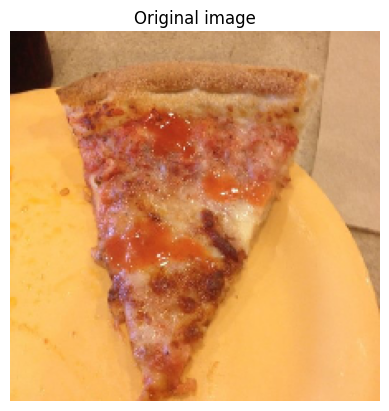

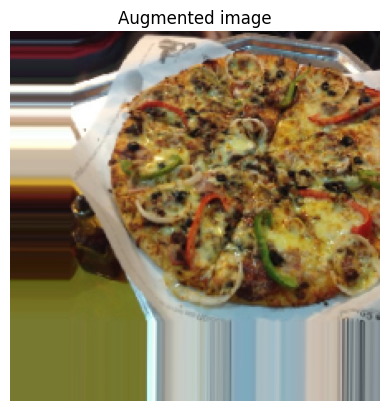

In [ ]:
import random
random_number = random.randint(0,31)
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);


In [ ]:
# Create a model (same as model_5)
model_6 = Sequential([
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])

model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=["accuracy"])

history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 463ms/step - loss: 0.6680 - accuracy: 0.5900 - val_loss: 0.5854 - val_accuracy: 0.6300
Epoch 2/5
47/47 [==============================] - 23s 483ms/step - loss: 0.5475 - accuracy: 0.7240 - val_loss: 0.4592 - val_accuracy: 0.7780
Epoch 3/5
47/47 [==============================] - 22s 476ms/step - loss: 0.5173 - accuracy: 0.7620 - val_loss: 0.4960 - val_accuracy: 0.7240
Epoch 4/5
47/47 [==============================] - 21s 446ms/step - loss: 0.4803 - accuracy: 0.7733 - val_loss: 0.3574 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 22s 471ms/step - loss: 0.4794 - accuracy: 0.7713 - val_loss: 0.3238 - val_accuracy: 0.8880


In [ ]:
# Create a model (same as model_5)
model_7 = Sequential([
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])

model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=["accuracy"])

history_7 = model_7.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 450ms/step - loss: 0.6652 - accuracy: 0.5980 - val_loss: 0.5554 - val_accuracy: 0.7480
Epoch 2/5
47/47 [==============================] - 22s 473ms/step - loss: 0.5721 - accuracy: 0.7147 - val_loss: 0.4349 - val_accuracy: 0.8040
Epoch 3/5
47/47 [==============================] - 27s 570ms/step - loss: 0.5575 - accuracy: 0.7340 - val_loss: 0.4185 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 21s 444ms/step - loss: 0.5412 - accuracy: 0.7367 - val_loss: 0.4909 - val_accuracy: 0.7660
Epoch 5/5
47/47 [==============================] - 22s 472ms/step - loss: 0.5316 - accuracy: 0.7467 - val_loss: 0.4168 - val_accuracy: 0.8380


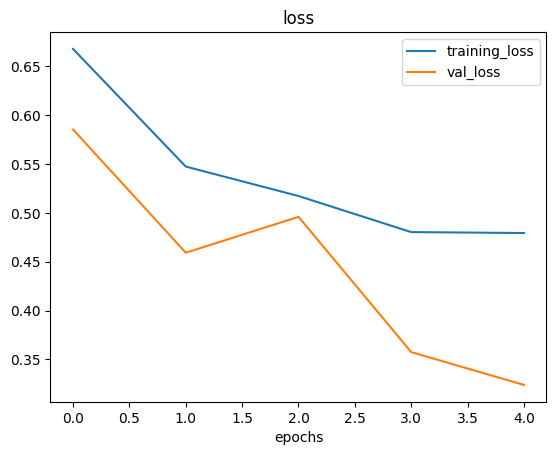

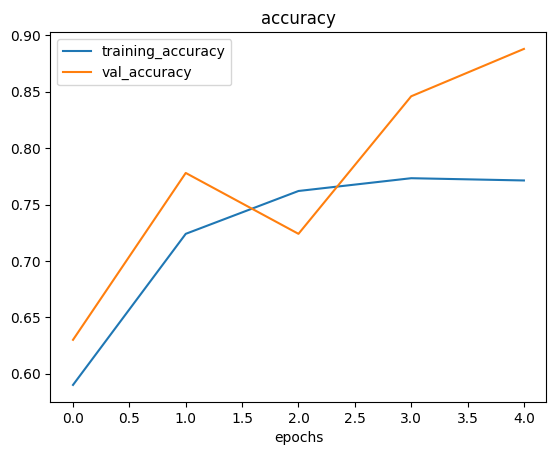

In [ ]:
# Check our models training curves

plot_loss_curves(history_6)

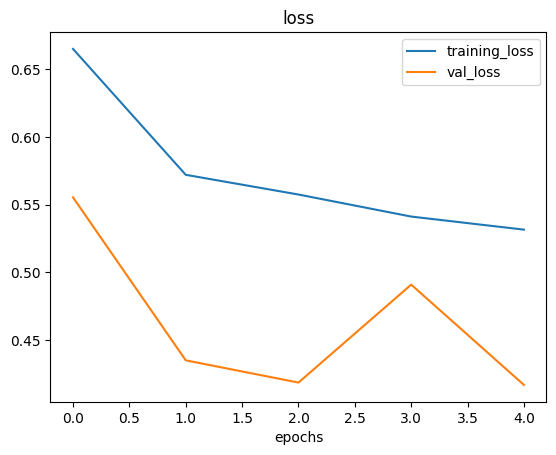

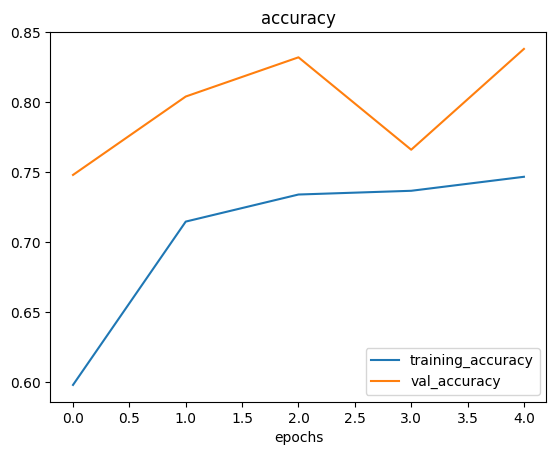

In [ ]:
plot_loss_curves(history_7)

In [ ]:
# Create a model (same as model_5)
model_8 = Sequential([
    Conv2D(10,3,activation="relu", input_shape=(224,224,3)),
    MaxPool2D(2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])

model_8.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=["accuracy"])

history_8 = model_8.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 487ms/step - loss: 0.6609 - accuracy: 0.5953 - val_loss: 0.5709 - val_accuracy: 0.6560
Epoch 2/5
47/47 [==============================] - 23s 484ms/step - loss: 0.5434 - accuracy: 0.7340 - val_loss: 0.4245 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 22s 467ms/step - loss: 0.5122 - accuracy: 0.7460 - val_loss: 0.4226 - val_accuracy: 0.7980
Epoch 4/5
47/47 [==============================] - 22s 476ms/step - loss: 0.4949 - accuracy: 0.7773 - val_loss: 0.4308 - val_accuracy: 0.8060
Epoch 5/5
47/47 [==============================] - 22s 464ms/step - loss: 0.4852 - accuracy: 0.7720 - val_loss: 0.3846 - val_accuracy: 0.8200


Ways to improve the model:

* Increase the number of model layers
* Increase the number of filters in each convolutional layer (from 10 to 32 or even 64)
* Train for longer
* Find and ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning**

In [ ]:
# Create a model (same as model_5)
model_own = Sequential([
    Conv2D(10,3,activation="relu", input_shape=(224,224,3)),
    MaxPool2D(2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])

model_own.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_own = model_own.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        callbacks=[lr_scheduler])

Epoch 1/5
47/47 [==============================] - 24s 475ms/step - loss: 0.7020 - accuracy: 0.4880 - val_loss: 0.6950 - val_accuracy: 0.5040 - lr: 1.0000e-04
Epoch 2/5
47/47 [==============================] - 22s 468ms/step - loss: 0.6862 - accuracy: 0.5493 - val_loss: 0.6604 - val_accuracy: 0.6680 - lr: 1.1220e-04
Epoch 3/5
47/47 [==============================] - 21s 445ms/step - loss: 0.6546 - accuracy: 0.6400 - val_loss: 0.6092 - val_accuracy: 0.7280 - lr: 1.2589e-04
Epoch 4/5
47/47 [==============================] - 22s 474ms/step - loss: 0.6224 - accuracy: 0.6687 - val_loss: 0.5526 - val_accuracy: 0.7280 - lr: 1.4125e-04
Epoch 5/5
47/47 [==============================] - 21s 449ms/step - loss: 0.5872 - accuracy: 0.6840 - val_loss: 0.5117 - val_accuracy: 0.7440 - lr: 1.5849e-04


In [ ]:
# Create a model (same as model_5)
model_own2 = Sequential([
    Conv2D(10,3,activation="relu", input_shape=(224,224,3)),
    MaxPool2D(2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])

model_own2.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(4*epoch/20))

history_own2 = model_own2.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        callbacks=[lr_scheduler])

Epoch 1/5
47/47 [==============================] - 24s 471ms/step - loss: 0.6536 - accuracy: 0.6107 - val_loss: 0.5104 - val_accuracy: 0.7540 - lr: 0.0010
Epoch 2/5
47/47 [==============================] - 22s 478ms/step - loss: 0.5412 - accuracy: 0.7353 - val_loss: 0.3748 - val_accuracy: 0.8440 - lr: 0.0016
Epoch 3/5
47/47 [==============================] - 21s 444ms/step - loss: 0.5514 - accuracy: 0.7253 - val_loss: 0.3601 - val_accuracy: 0.8400 - lr: 0.0025
Epoch 4/5
47/47 [==============================] - 22s 480ms/step - loss: 0.4865 - accuracy: 0.7713 - val_loss: 0.3816 - val_accuracy: 0.8260 - lr: 0.0040
Epoch 5/5
47/47 [==============================] - 23s 488ms/step - loss: 0.4985 - accuracy: 0.7713 - val_loss: 0.3812 - val_accuracy: 0.8240 - lr: 0.0063


<Axes: xlabel='epochs'>

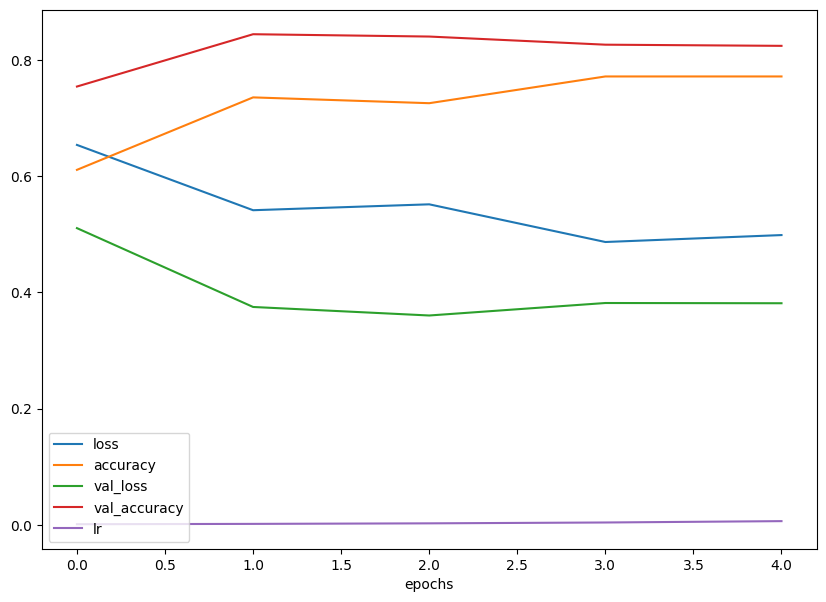

In [ ]:
import pandas as pd
pd.DataFrame(history_own2.history).plot(figsize=(10,7), xlabel="epochs")

In [ ]:
lrs = 1e-3 * 10**(4*tf.range(5)/20)

In [ ]:
lrs

<tf.Tensor: shape=(5,), dtype=float64, numpy=array([0.001     , 0.00158489, 0.00251189, 0.00398107, 0.00630957])>

Text(0.5, 1.0, 'Lr vs loss')

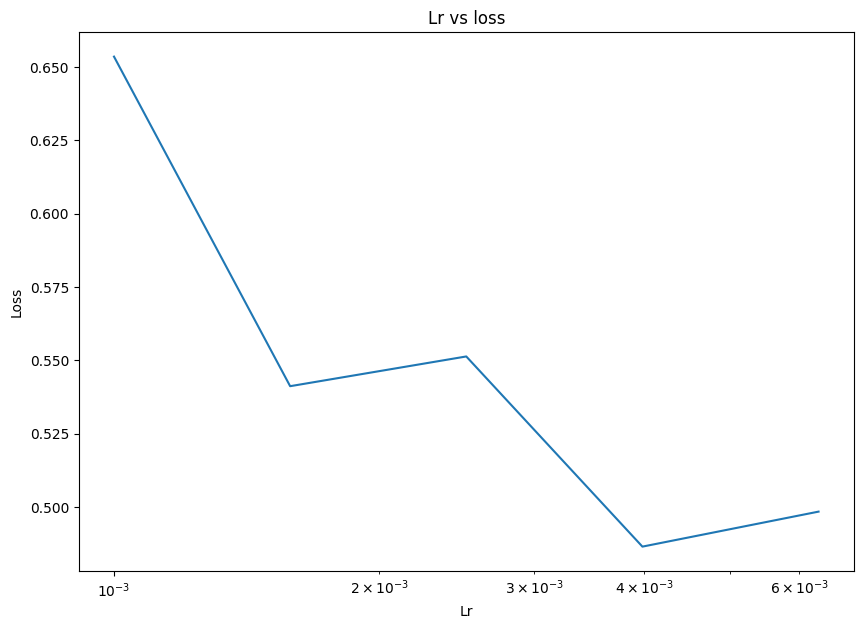

In [ ]:
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_own2.history["loss"])
plt.xlabel("Lr")
plt.ylabel("Loss")
plt.title("Lr vs loss")

In [ ]:
model_final = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(32,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(32,3,activation="relu"),
    tf.keras.layers.Conv2D(32,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")

])

model_final.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_final = model_final.fit(train_data_augmented, epochs=5, steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 34s 580ms/step - loss: 0.6379 - accuracy: 0.6360 - val_loss: 0.5775 - val_accuracy: 0.6780
Epoch 2/5
47/47 [==============================] - 23s 488ms/step - loss: 0.5209 - accuracy: 0.7500 - val_loss: 0.4127 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 23s 498ms/step - loss: 0.5139 - accuracy: 0.7507 - val_loss: 0.3802 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 23s 489ms/step - loss: 0.4846 - accuracy: 0.7860 - val_loss: 0.3579 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 22s 468ms/step - loss: 0.4597 - accuracy: 0.7967 - val_loss: 0.3221 - val_accuracy: 0.8720


In [ ]:
model_final2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")

])

model_final2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_final2 = model_final2.fit(train_data_augmented, epochs=5, steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 479ms/step - loss: 0.6521 - accuracy: 0.5980 - val_loss: 0.6788 - val_accuracy: 0.5820
Epoch 2/5
47/47 [==============================] - 23s 482ms/step - loss: 0.5501 - accuracy: 0.7140 - val_loss: 0.4058 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 22s 466ms/step - loss: 0.4950 - accuracy: 0.7627 - val_loss: 0.3941 - val_accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 23s 489ms/step - loss: 0.4809 - accuracy: 0.7713 - val_loss: 0.3365 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 22s 461ms/step - loss: 0.4746 - accuracy: 0.7867 - val_loss: 0.5253 - val_accuracy: 0.7640


In [ ]:
model_final3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")

])

model_final3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_final3 = model_final3.fit(train_data, epochs=10, steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 7s 123ms/step - loss: 0.5988 - accuracy: 0.6953 - val_loss: 0.4310 - val_accuracy: 0.7960
Epoch 2/10
47/47 [==============================] - 6s 119ms/step - loss: 0.4818 - accuracy: 0.7887 - val_loss: 0.4551 - val_accuracy: 0.7980
Epoch 3/10
47/47 [==============================] - 6s 136ms/step - loss: 0.4327 - accuracy: 0.8093 - val_loss: 0.3763 - val_accuracy: 0.8440
Epoch 4/10
47/47 [==============================] - 6s 125ms/step - loss: 0.3992 - accuracy: 0.8367 - val_loss: 0.3374 - val_accuracy: 0.8480
Epoch 5/10
47/47 [==============================] - 6s 125ms/step - loss: 0.3480 - accuracy: 0.8513 - val_loss: 0.3413 - val_accuracy: 0.8380
Epoch 6/10
47/47 [==============================] - 6s 131ms/step - loss: 0.2852 - accuracy: 0.8887 - val_loss: 0.3700 - val_accuracy: 0.8520
Epoch 7/10
47/47 [==============================] - 6s 123ms/step - loss: 0.2004 - accuracy: 0.9293 - val_loss: 0.3995 - val_accuracy: 0.8320
Epoch 

In [ ]:
model_final4 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")

])

model_final4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_final4 = model_final4.fit(train_data, epochs=10, steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

<Axes: xlabel='epochs'>

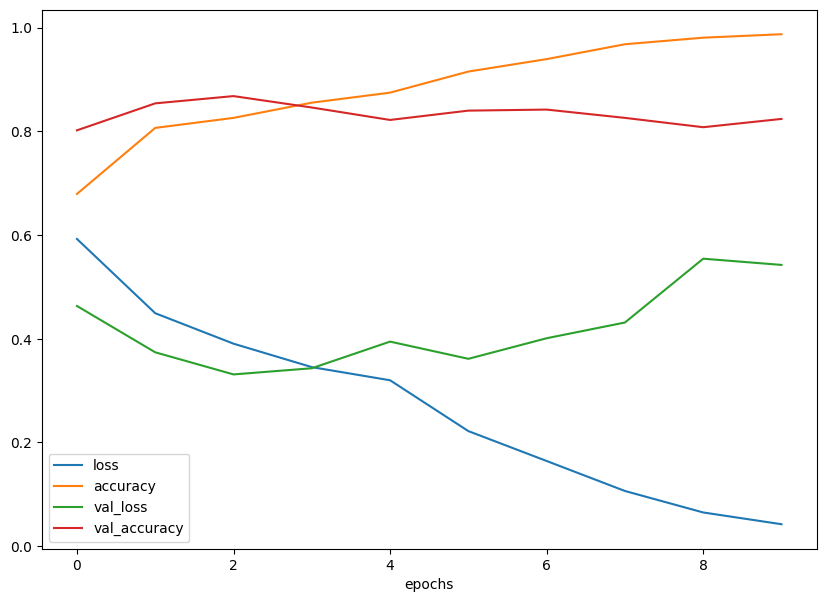

In [ ]:
pd.DataFrame(history_final4.history).plot(figsize=(10,7), xlabel="epochs")

In [ ]:
model_final_ = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(32,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(32,3,activation="relu"),
    tf.keras.layers.Conv2D(32,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")

])

model_final_.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_final_ = model_final_.fit(train_data, epochs=10, steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 9s 159ms/step - loss: 0.5733 - accuracy: 0.7100 - val_loss: 0.4281 - val_accuracy: 0.7920
Epoch 2/10
47/47 [==============================] - 6s 131ms/step - loss: 0.4695 - accuracy: 0.7927 - val_loss: 0.3980 - val_accuracy: 0.8320
Epoch 3/10
47/47 [==============================] - 7s 151ms/step - loss: 0.4390 - accuracy: 0.8067 - val_loss: 0.3999 - val_accuracy: 0.8320
Epoch 4/10
47/47 [==============================] - 7s 154ms/step - loss: 0.3883 - accuracy: 0.8340 - val_loss: 0.3420 - val_accuracy: 0.8620
Epoch 5/10
47/47 [==============================] - 6s 126ms/step - loss: 0.3868 - accuracy: 0.8333 - val_loss: 0.3341 - val_accuracy: 0.8540
Epoch 6/10
47/47 [==============================] - 7s 142ms/step - loss: 0.3361 - accuracy: 0.8627 - val_loss: 0.3691 - val_accuracy: 0.8520
Epoch 7/10
47/47 [==============================] - 7s 146ms/step - loss: 0.2628 - accuracy: 0.8920 - val_loss: 0.3131 - val_accuracy: 0.8600
Epoch 

In [ ]:
model_final_X = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=16,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(16,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(32,3,activation="relu"),
    tf.keras.layers.Conv2D(32,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")

])

model_final_X.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_final_X = model_final_X.fit(train_data, epochs=10, steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 12s 177ms/step - loss: 0.6284 - accuracy: 0.6600 - val_loss: 0.4475 - val_accuracy: 0.8020
Epoch 2/10
47/47 [==============================] - 6s 125ms/step - loss: 0.4504 - accuracy: 0.8020 - val_loss: 0.3699 - val_accuracy: 0.8520
Epoch 3/10
47/47 [==============================] - 6s 133ms/step - loss: 0.4095 - accuracy: 0.8200 - val_loss: 0.4281 - val_accuracy: 0.7940
Epoch 4/10
47/47 [==============================] - 6s 121ms/step - loss: 0.3905 - accuracy: 0.8240 - val_loss: 0.3805 - val_accuracy: 0.8320
Epoch 5/10
47/47 [==============================] - 7s 138ms/step - loss: 0.3619 - accuracy: 0.8473 - val_loss: 0.3206 - val_accuracy: 0.8700
Epoch 6/10
47/47 [==============================] - 7s 140ms/step - loss: 0.3319 - accuracy: 0.8653 - val_loss: 0.3663 - val_accuracy: 0.8380
Epoch 7/10
47/47 [==============================] - 6s 120ms/step - loss: 0.2818 - accuracy: 0.8907 - val_loss: 0.3624 - val_accuracy: 0.8400
Epoch

In [ ]:
model_final_XX = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3),
                           padding="same"),
    tf.keras.layers.Conv2D(10,3,activation="relu",
                           padding="same"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,3,activation="relu",
                           padding="same"),
    tf.keras.layers.Conv2D(10,3,activation="relu",
                           padding="same"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")

])
model_final_XX.summary()

model_final_XX.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_final_XX = model_final_XX.fit(train_data, epochs=10, steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_49 (Conv2D)          (None, 224, 224, 10)      280       
                                                                 
 conv2d_50 (Conv2D)          (None, 224, 224, 10)      910       
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 112, 112, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_51 (Conv2D)          (None, 112, 112, 10)      910       
                                                                 
 conv2d_52 (Conv2D)          (None, 112, 112, 10)      910       
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 56, 56, 10)        0         
 ng2D)                                               

In [ ]:
#THE BEST
model_final_Y = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3),
                           padding="same"),
    tf.keras.layers.Conv2D(10,3,activation="relu",
                           padding="same"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(10,3,activation="relu",
                           padding="same"),
    tf.keras.layers.Conv2D(10,3,activation="relu",
                           padding="same"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")

])
model_final_Y.summary()

model_final_Y.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_final_Y = model_final_Y.fit(train_data, epochs=10, steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_53 (Conv2D)          (None, 224, 224, 10)      280       
                                                                 
 conv2d_54 (Conv2D)          (None, 224, 224, 10)      910       
                                                                 
 max_pooling2d_34 (MaxPooli  (None, 112, 112, 10)      0         
 ng2D)                                                           
                                                                 
 dropout (Dropout)           (None, 112, 112, 10)      0         
                                                                 
 conv2d_55 (Conv2D)          (None, 112, 112, 10)      910       
                                                                 
 conv2d_56 (Conv2D)          (None, 112, 112, 10)      910       
                                                     

In [ ]:
model_1_enchanced = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")

])

model_1_enchanced.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1_enchanced = model_1_enchanced.fit(train_data, epochs=10, steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 7s 118ms/step - loss: 0.5874 - accuracy: 0.7000 - val_loss: 0.5391 - val_accuracy: 0.7740
Epoch 2/10
47/47 [==============================] - 6s 137ms/step - loss: 0.4593 - accuracy: 0.7847 - val_loss: 0.3502 - val_accuracy: 0.8720
Epoch 3/10
47/47 [==============================] - 6s 124ms/step - loss: 0.3606 - accuracy: 0.8440 - val_loss: 0.3304 - val_accuracy: 0.8500
Epoch 4/10
47/47 [==============================] - 5s 115ms/step - loss: 0.3195 - accuracy: 0.8793 - val_loss: 0.4037 - val_accuracy: 0.8080
Epoch 5/10
47/47 [==============================] - 6s 131ms/step - loss: 0.2514 - accuracy: 0.8993 - val_loss: 0.3151 - val_accuracy: 0.8480
Epoch 6/10
47/47 [==============================] - 6s 118ms/step - loss: 0.1898 - accuracy: 0.9280 - val_loss: 0.3344 - val_accuracy: 0.8480
Epoch 7/10
47/47 [==============================] - 6s 137ms/step - loss: 0.1209 - accuracy: 0.9620 - val_loss: 0.3452 - val_accuracy: 0.8460
Epoch 

### Making a prediction with our trained model on our own custom data

In [ ]:
print(class_names)

['pizza' 'steak']


In [ ]:
import matplotlib.image as mpimg
!wget https://popmenucloud.com/cdn-cgi/image/width%3D1200%2Cheight%3D1200%2Cfit%3Dscale-down%2Cformat%3Dauto%2Cquality%3D60/onhsiagk/c6000032-e635-4bcb-9fcc-7d9a6a049611.jpg


--2023-12-23 20:44:54--  https://popmenucloud.com/cdn-cgi/image/width%3D1200%2Cheight%3D1200%2Cfit%3Dscale-down%2Cformat%3Dauto%2Cquality%3D60/onhsiagk/c6000032-e635-4bcb-9fcc-7d9a6a049611.jpg
Resolving popmenucloud.com (popmenucloud.com)... 104.18.211.119, 104.18.212.119, 2606:4700::6812:d477, ...
Connecting to popmenucloud.com (popmenucloud.com)|104.18.211.119|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200279 (196K) [image/jpeg]
Saving to: ‘c6000032-e635-4bcb-9fcc-7d9a6a049611.jpg.1’

c6000032-e635-4bcb- 100%[===================>] 195.58K  --.-KB/s    in 0.009s  

2023-12-23 20:44:54 (20.5 MB/s) - ‘c6000032-e635-4bcb-9fcc-7d9a6a049611.jpg.1’ saved [200279/200279]



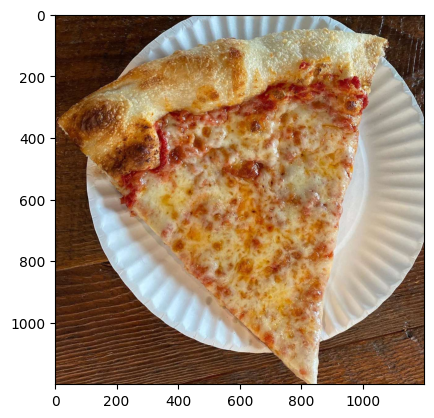

In [ ]:
pizza = mpimg.imread('pizza.jpg')
plt.imshow(pizza)

In [ ]:
pizza.shape

In [ ]:
pizza

In [ ]:
expanded_pizza = tf.expand_dims(pizza, axis=0)

YOU NEED TO PREPROCESS CUSTOM IMAGE to fit the model!

In [3]:
def load_and_prep_image(filename, img_shape=224):
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale
  img = img / 255.
  return img

In [ ]:
pizza_git = load_and_prep_image('pizza.jpg')

In [ ]:
pizza_git

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.19847439, 0.09651361, 0.00644258],
        [0.20733793, 0.10537715, 0.01583133],
        [0.21906762, 0.11710685, 0.02691077],
        ...,
        [0.20293194, 0.10391329, 0.03941274],
        [0.42376125, 0.40382823, 0.39303905],
        [0.28306806, 0.18692988, 0.11557668]],

       [[0.23791017, 0.13594936, 0.04575329],
        [0.18327333, 0.08131254, 0.00994898],
        [0.23416868, 0.1322079 , 0.04201181],
        ...,
        [0.26902056, 0.17751479, 0.16292432],
        [0.11703247, 0.06518555, 0.07233949],
        [0.18351837, 0.09150176, 0.07651584]],

       [[0.21863742, 0.11667664, 0.03085732],
        [0.16242996, 0.06046918, 0.        ],
        [0.17832635, 0.07636557, 0.        ],
        ...,
        [0.35863417, 0.28804594, 0.2480797 ],
        [0.16450298, 0.08957301, 0.03405605],
        [0.15070027, 0.08298813, 0.04252182]],

       ...,

       [[0.39604774, 0.24268624, 0.1289712 ],
        [0.39

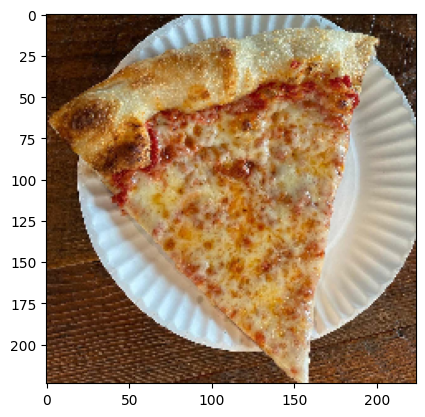

In [ ]:
plt.imshow(pizza_git)

In [ ]:
pred = model_final_Y.predict(tf.expand_dims(pizza_git, axis=0))

1/1 [==============================] - 0s 27ms/step


In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'pizza'

In [4]:
def pred_and_plot(model, filename, class_names=class_names):
  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img, axis=0))

  pred_class = class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

NameError: ignored

1/1 [==============================] - 0s 18ms/step


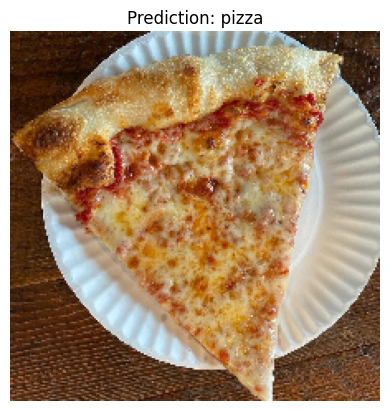

In [ ]:
pred_and_plot(model_final_Y, "pizza.jpg")

--2023-12-23 21:00:43--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.05s   

2023-12-23 21:00:44 (54.5 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 40ms/step


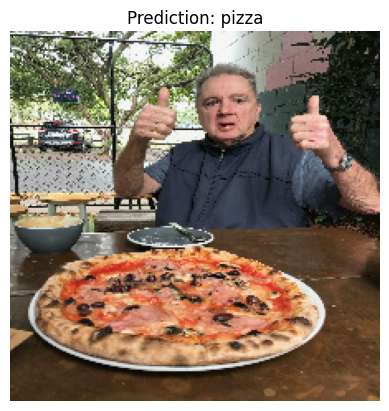

In [ ]:
# Download another test image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_final_Y, "03-pizza-dad.jpeg", class_names)

## MULTI-CLASS CLASIFICATION WITH CNN

In [5]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-12-25 20:27:15--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.170.207, 142.251.175.207, 74.125.24.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.170.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  23.0MB/s    in 23s     

2023-12-25 20:27:39 (21.4 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [6]:
import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.

In [7]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [8]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [9]:
# View a random image from the training dataset
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) # get a random class name

NameError: ignored

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, except to be multi-class)
model_9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_9.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_9 = model_9.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 38s 137ms/step - loss: 2.2246 - accuracy: 0.1747 - val_loss: 2.1641 - val_accuracy: 0.2100
Epoch 2/5
235/235 [==============================] - 29s 122ms/step - loss: 2.0264 - accuracy: 0.2919 - val_loss: 1.9713 - val_accuracy: 0.2952
Epoch 3/5
235/235 [==============================] - 29s 125ms/step - loss: 1.5756 - accuracy: 0.4740 - val_loss: 2.0120 - val_accuracy: 0.3156
Epoch 4/5
235/235 [==============================] - 30s 126ms/step - loss: 0.8185 - accuracy: 0.7401 - val_loss: 2.5725 - val_accuracy: 0.2924
Epoch 5/5
235/235 [==============================] - 31s 133ms/step - loss: 0.2616 - accuracy: 0.9235 - val_loss: 3.7678 - val_accuracy: 0.2708


In [ ]:
# Evaluate on the test data
model_9.evaluate(test_data)

79/79 [==============================] - 10s 118ms/step - loss: 3.7678 - accuracy: 0.2708


[3.767770767211914, 0.27079999446868896]

In [ ]:
train_data.next()

(array([[[[0.28235295, 0.2392157 , 0.16078432],
          [0.3921569 , 0.34509805, 0.2901961 ],
          [0.40000004, 0.35686275, 0.33333334],
          ...,
          [0.14117648, 0.37254903, 0.60784316],
          [0.14509805, 0.36862746, 0.5764706 ],
          [0.20000002, 0.4431373 , 0.6039216 ]],
 
         [[0.6       , 0.54901963, 0.47450984],
          [0.46274513, 0.4156863 , 0.3529412 ],
          [0.49803925, 0.45882356, 0.42352945],
          ...,
          [0.10980393, 0.34901962, 0.5647059 ],
          [0.16470589, 0.3921569 , 0.5803922 ],
          [0.20000002, 0.43529415, 0.5803922 ]],
 
         [[0.5568628 , 0.49803925, 0.4156863 ],
          [0.62352943, 0.57254905, 0.5058824 ],
          [0.5686275 , 0.52156866, 0.47450984],
          ...,
          [0.20000002, 0.45098042, 0.6392157 ],
          [0.19215688, 0.42352945, 0.5803922 ],
          [0.14509805, 0.36862746, 0.48627454]],
 
         ...,
 
         [[0.01176471, 0.03529412, 0.02745098],
          [0.01960

In [ ]:
len(train_data)

235

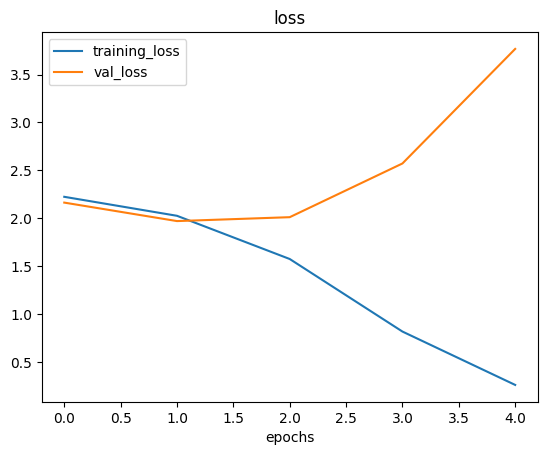

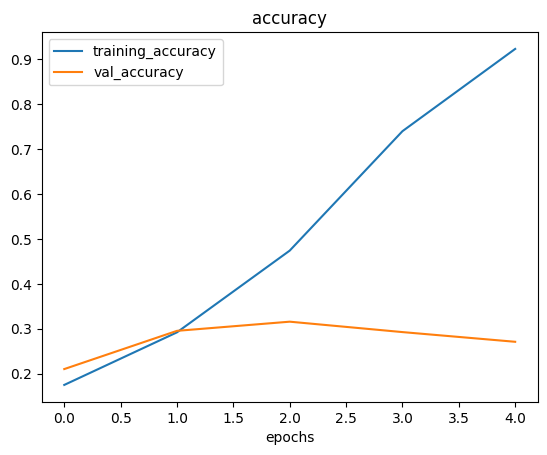

In [ ]:
plot_loss_curves(history_9)

In [12]:
# Try a simplified model (removed two layers)
model_10 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 34s 129ms/step - loss: 2.1803 - accuracy: 0.2100 - val_loss: 1.9798 - val_accuracy: 0.2892
Epoch 2/5
235/235 [==============================] - 28s 119ms/step - loss: 1.7942 - accuracy: 0.3873 - val_loss: 1.9415 - val_accuracy: 0.3120
Epoch 3/5
235/235 [==============================] - 31s 133ms/step - loss: 1.4196 - accuracy: 0.5295 - val_loss: 1.9190 - val_accuracy: 0.3400
Epoch 4/5
235/235 [==============================] - 28s 117ms/step - loss: 1.0042 - accuracy: 0.6845 - val_loss: 2.1147 - val_accuracy: 0.3120
Epoch 5/5
235/235 [==============================] - 29s 122ms/step - loss: 0.5935 - accuracy: 0.8307 - val_loss: 2.4819 - val_accuracy: 0.3056


In [13]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [14]:
# Clone the model (use the same architecture)
model_11 = tf.keras.models.clone_model(model_10)

# Compile the cloned model (same setup as used for model_10)
model_11.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_11 = model_11.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 107s 449ms/step - loss: 2.2715 - accuracy: 0.1885 - val_loss: 2.0526 - val_accuracy: 0.2612
Epoch 2/5
235/235 [==============================] - 109s 461ms/step - loss: 2.0842 - accuracy: 0.2536 - val_loss: 1.9886 - val_accuracy: 0.2972
Epoch 3/5
235/235 [==============================] - 110s 467ms/step - loss: 2.0515 - accuracy: 0.2717 - val_loss: 1.9800 - val_accuracy: 0.3004
Epoch 4/5
235/235 [==============================] - 108s 461ms/step - loss: 2.0108 - accuracy: 0.2899 - val_loss: 1.9130 - val_accuracy: 0.3124
Epoch 5/5
235/235 [==============================] - 105s 448ms/step - loss: 1.9788 - accuracy: 0.3091 - val_loss: 1.8893 - val_accuracy: 0.3456


### Making a prediction with our trained model

In [ ]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [ ]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):

  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 159ms/step


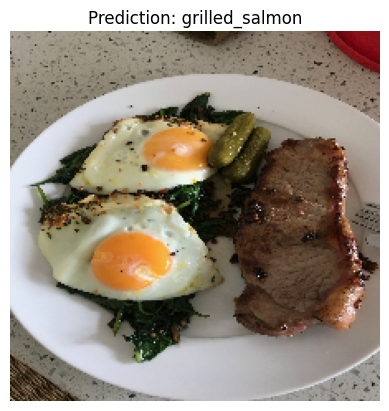

In [ ]:
pred_and_plot(model_11, "03-steak.jpeg", class_names)

1/1 [==============================] - 0s 19ms/step


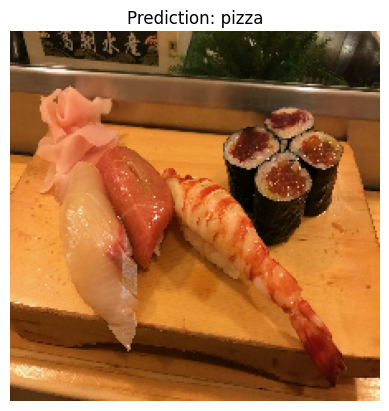

In [ ]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)

1/1 [==============================] - 0s 21ms/step


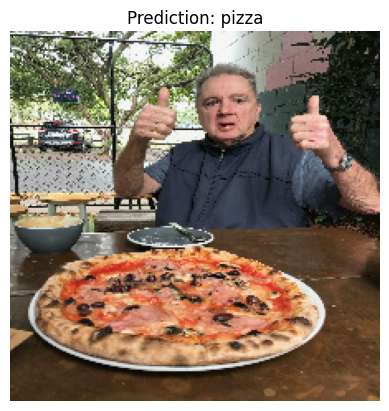

In [ ]:
pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names)

1/1 [==============================] - 0s 17ms/step


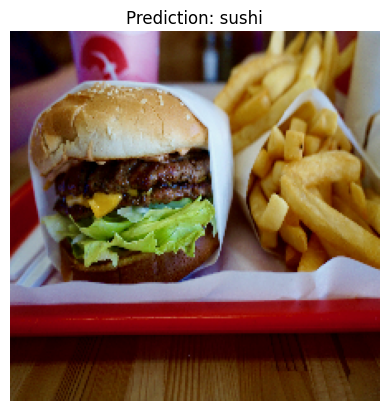

In [ ]:
pred_and_plot(model_11, "03-hamburger.jpeg", class_names)

In [ ]:
model_mine = Sequential([
  Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3), padding='same'),
  Conv2D(32, 3, activation='relu', padding='same'),
  MaxPool2D(),
  Conv2D(64, 3, activation='relu', padding='same'),
  Conv2D(64, 3, activation='relu', padding='same'),
  MaxPool2D(),
  Conv2D(128, 3, activation='relu', padding='same'),
  Conv2D(128, 3, activation='relu', padding='same'),
  MaxPool2D(),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(10, activation='softmax')
])


model_mine.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_mine.fit(train_data,
               epochs=5,
               steps_per_epoch=len(train_data),
               validation_data=test_data,
               validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 51s 181ms/step - loss: 2.1783 - accuracy: 0.1847 - val_loss: 2.0786 - val_accuracy: 0.2144
Epoch 2/5
235/235 [==============================] - 38s 160ms/step - loss: 2.0128 - accuracy: 0.2788 - val_loss: 1.9021 - val_accuracy: 0.3240
Epoch 3/5
235/235 [==============================] - 38s 161ms/step - loss: 1.7576 - accuracy: 0.3871 - val_loss: 1.8208 - val_accuracy: 0.3780
Epoch 4/5
235/235 [==============================] - 36s 154ms/step - loss: 1.3985 - accuracy: 0.5200 - val_loss: 1.8868 - val_accuracy: 0.3600
Epoch 5/5
235/235 [==============================] - 36s 153ms/step - loss: 0.8469 - accuracy: 0.7132 - val_loss: 2.6612 - val_accuracy: 0.3488


In [ ]:
model_mine.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_67 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 conv2d_68 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_42 (MaxPooli  (None, 112, 112, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_69 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 conv2d_70 (Conv2D)          (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_43 (MaxPooli  (None, 56, 56, 64)        0         
 ng2D)                                               

In [ ]:
from tensorflow.keras.layers import Dropout, BatchNormalization

model_mine2 = Sequential([
  Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3), padding='same'),
  Conv2D(32, 3, activation='relu', padding='same'),
  MaxPool2D(),
  Dropout(0.1),

  Conv2D(64, 3, activation='relu', padding='same'),
  Conv2D(64, 3, activation='relu', padding='same'),
  MaxPool2D(),
  Dropout(0.1),

  Conv2D(128, 3, activation='relu', padding='same'),
  Conv2D(128, 3, activation='relu', padding='same'),
  MaxPool2D(),
  Dropout(0.1),

  Flatten(),

  Dense(128, activation='relu'),
  Dropout(0.2),
  Dense(10, activation='softmax')
])


model_mine2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
                metrics=["accuracy"])

In [ ]:
from tensorflow.keras.layers import Dropout, BatchNormalization

model_mine3 = Sequential([
  Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3), padding='same'),
  Conv2D(32, 3, activation='relu', padding='same'),
  MaxPool2D(),
  Dropout(0.1),

  Conv2D(64, 3, activation='relu', padding='same'),
  Conv2D(64, 3, activation='relu', padding='same'),
  MaxPool2D(),
  Dropout(0.1),

  Conv2D(128, 3, activation='relu', padding='same'),
  Conv2D(128, 3, activation='relu', padding='same'),
  MaxPool2D(),
  Dropout(0.1),

  Flatten(),

  Dense(128, activation='relu'),
  Dropout(0.2),
  Dense(10, activation='softmax')
])


model_mine3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
                metrics=["accuracy"])

In [ ]:
model_mine_augmented = Sequential([
  Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3), padding='same'),
  Conv2D(32, 3, activation='relu', padding='same'),
  MaxPool2D(),
  Conv2D(64, 3, activation='relu', padding='same'),
  Conv2D(64, 3, activation='relu', padding='same'),
  MaxPool2D(),
  Conv2D(128, 3, activation='relu', padding='same'),
  Conv2D(128, 3, activation='relu', padding='same'),
  MaxPool2D(),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(10, activation='softmax')
])


model_mine_augmented.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_mine_augmented.fit(train_data_augmented,
               epochs=5,
               steps_per_epoch=len(train_data_augmented),
               validation_data=test_data,
               validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 121s 497ms/step - loss: 2.2770 - accuracy: 0.1287 - val_loss: 2.1488 - val_accuracy: 0.1920
Epoch 2/5
235/235 [==============================] - 119s 506ms/step - loss: 2.1742 - accuracy: 0.1849 - val_loss: 2.0945 - val_accuracy: 0.2060
Epoch 3/5
235/235 [==============================] - 116s 492ms/step - loss: 2.1223 - accuracy: 0.2183 - val_loss: 2.0372 - val_accuracy: 0.2520
Epoch 4/5
235/235 [==============================] - 117s 499ms/step - loss: 2.0652 - accuracy: 0.2520 - val_loss: 2.0007 - val_accuracy: 0.2816
Epoch 5/5
235/235 [==============================] - 122s 518ms/step - loss: 2.0212 - accuracy: 0.2715 - val_loss: 1.9226 - val_accuracy: 0.3028


In [ ]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [ ]:
model__= Sequential([
        Conv2D(filters=128, kernel_size=(5, 5), padding='valid', input_shape=(224,224, 3)),
        Activation('relu'),
        MaxPool2D(pool_size=(2, 2)),
        BatchNormalization(),

        Conv2D(filters=64, kernel_size=(3, 3), padding='valid', kernel_regularizer=regularizers.l2(0.00005)),
        Activation('relu'),
        MaxPool2D(pool_size=(2, 2)),
        BatchNormalization(),

        Conv2D(filters=32, kernel_size=(3, 3), padding='valid', kernel_regularizer=regularizers.l2(0.00005)),
        Activation('relu'),
        MaxPool2D(pool_size=(2, 2)),
        BatchNormalization(),

        Flatten(),

        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)

model__.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

In [ ]:
history = model__.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data),
                       callbacks=[reduce_lr])

Epoch 1/5
235/235 [==============================] - 52s 198ms/step - loss: 5.4097 - accuracy: 0.1655 - val_loss: 3.5787 - val_accuracy: 0.1284 - lr: 0.0010
Epoch 2/5
235/235 [==============================] - 39s 167ms/step - loss: 2.3572 - accuracy: 0.2356 - val_loss: 2.1073 - val_accuracy: 0.2520 - lr: 0.0010
Epoch 3/5
235/235 [==============================] - 39s 165ms/step - loss: 1.9521 - accuracy: 0.3201 - val_loss: 2.0704 - val_accuracy: 0.2868 - lr: 0.0010
Epoch 4/5
235/235 [==============================] - 36s 153ms/step - loss: 1.7410 - accuracy: 0.3835 - val_loss: 2.0217 - val_accuracy: 0.3028 - lr: 0.0010
Epoch 5/5
235/235 [==============================] - 43s 181ms/step - loss: 1.5666 - accuracy: 0.4453 - val_loss: 2.0991 - val_accuracy: 0.3240 - lr: 0.0010


In [ ]:
history = model__.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data),
                       callbacks=[reduce_lr])

In [ ]:
model__.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_94 (Conv2D)          (None, 220, 220, 128)     9728      
                                                                 
 activation_3 (Activation)   (None, 220, 220, 128)     0         
                                                                 
 max_pooling2d_57 (MaxPooli  (None, 110, 110, 128)     0         
 ng2D)                                                           
                                                                 
 batch_normalization_3 (Bat  (None, 110, 110, 128)     512       
 chNormalization)                                                
                                                                 
 conv2d_95 (Conv2D)          (None, 108, 108, 64)      73792     
                                                                 
 activation_4 (Activation)   (None, 108, 108, 64)    

In [15]:
model_11.save("saved_trained_model")

In [16]:
loaded_model_11 = tf.keras.models.load_model("saved_trained_model")

In [18]:
loaded_model_11.evaluate(test_data)

79/79 [==============================] - 7s 86ms/step - loss: 1.8893 - accuracy: 0.3456


[1.8893024921417236, 0.3456000089645386]